In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



<h4>Setup</h4>


This function will download the dataset into your browser


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [ ]:
#  URL tải file dữ liệu
path <- 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'


you will need to download the dataset; if you are running locally, please comment out the following


In [ ]:
# Đặt tên file mới khi lưu về local
local_file <- "auto.csv"

# Hàm download file
download_data <- function(url, filename) {
  tryCatch({
    download.file(url = url,
                 destfile = filename,
                 mode = "wb")

    if (file.exists(filename)) {
      message("File downloaded successfully!")
      return(TRUE)
    } else {
      warning("Download failed - File does not exist")
      return(FALSE)
    }
  }, error = function(e) {
    warning(paste("Error downloading file:", e$message))
    return(FALSE)
  })
}

# Tải file về máy
download_data(path, local_file)

# Cập nhật đường dẫn để trỏ đến file local
path <- local_file

# Đọc dữ liệu nếu file tồn tại
if (file.exists(path)) {
  df <- read.csv(path)
  print(head(df))  # Hiển thị vài dòng đầu tiên của dữ liệu
} else {
  warning("File không tồn tại sau khi tải về. Vui lòng kiểm tra URL và thử lại.")
}


Warning message in download.file(url = url, destfile = filename, mode = "wb"):
“URL 'http://auto.csv/': status was 'Couldn't resolve host name'”
Warning message in value[[3L]](cond):
“Error downloading file: cannot open URL 'auto.csv'”


[1] FALSE

Warning message:
“File không tồn tại sau khi tải về. Vui lòng kiểm tra URL và thử lại.”


First, let's only use numeric data:


In [ ]:
str(df)

'data.frame':	201 obs. of  31 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Unnamed..0       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: int  122 122 122 164 164 122 158 122 158 192 ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  0.811 0.811 0.823 0.849 0.849 ...
 $ width            : num  0.89 0.89 0.91 0.919 0.922 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.

In [ ]:
# Kiểm tra dữ liệu
head(df)

,X,Unnamed..0,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,⋯,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>
1,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,⋯,9.0,111,5000,21,27,13495,11.190476,Medium,0,1
2,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,⋯,9.0,111,5000,21,27,16500,11.190476,Medium,0,1
3,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,⋯,9.0,154,5000,19,26,16500,12.368421,Medium,0,1
4,3,3,2,164,audi,std,four,sedan,fwd,front,⋯,10.0,102,5500,24,30,13950,9.791667,Medium,0,1
5,4,4,2,164,audi,std,four,sedan,4wd,front,⋯,8.0,115,5500,18,22,17450,13.055556,Medium,0,1
6,5,5,2,122,audi,std,two,sedan,fwd,front,⋯,8.5,110,5500,19,25,15250,12.368421,Medium,0,1


<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [ ]:
# Tạo dataframe y_data chứa biến price
y_data <- data.frame(price = df$price)

# Kiểm tra kết quả
head(y_data)

,price
,<dbl>
1,13495
2,16500
3,16500
4,13950
5,17450
6,15250


Drop price data in dataframe **x_data**:


In [ ]:
#x_data <- subset(df, select = -price)

# Sử dụng toán tử [-]
x_data <- df[, !names(df) %in% c("price")]

# Kiểm tra kết quả
head(x_data)
dim(x_data)

,X,Unnamed..0,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,⋯,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,city.L.100km,horsepower.binned,diesel,gas
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<int>
1,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,⋯,2.68,9.0,111,5000,21,27,11.190476,Medium,0,1
2,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,⋯,2.68,9.0,111,5000,21,27,11.190476,Medium,0,1
3,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,⋯,3.47,9.0,154,5000,19,26,12.368421,Medium,0,1
4,3,3,2,164,audi,std,four,sedan,fwd,front,⋯,3.40,10.0,102,5500,24,30,9.791667,Medium,0,1
5,4,4,2,164,audi,std,four,sedan,4wd,front,⋯,3.40,8.0,115,5500,18,22,13.055556,Medium,0,1
6,5,5,2,122,audi,std,two,sedan,fwd,front,⋯,3.40,8.5,110,5500,19,25,12.368421,Medium,0,1


[1] 201  30

## Section 1: Splitting Data for Training and Testing (90-10 Split)
In this section, you will split the data into Training and Testing sets. The goal is to create a training set containing 90% of the data and a testing set containing 10% of the data. This random but controlled split ensures that the model's training and evaluation are reliable.

Using the indices created, split the data into two sets: **x_train** and **x_test** from **x_data**, and **y_train** and **y_test** from **y_data**.

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
set.seed(123)
# TO DO: Use createDataPartition to generate indices for splitting the data


# TO DO: Split the data into training and testing sets


# TO DO: Print the number of samples in each set and check the data dimensions

number of test samples: 20 
number of training samples: 181

[1] 181  30

[1] 20 30

**Questions:**
1. What is the purpose of setting a seed with set.seed(123)?

Answer:
2. Why is the createDataPartition function used, and what does setting p = 0.9 mean?

Answer:


## Section 2: Building and Evaluating a Linear Regression Model (60-40 Split)
In this section, you will:

1. Split the data into a new training and testing set using a 60% training and 40% testing ratio.

2. Fit a linear regression model using horsepower as the predictor for price based on the training data.
3. Evaluate the model using the R-squared metric for both the testing and training sets to assess the model's performance.

In [ ]:
# Thiết lập random seed
set.seed(123)

# TO DO: Use createDataPartition to generate indices for splitting the data (60% for training)




#Use the indices to split the data into x_train1 and x_test1 from x_data, and y_train1 and y_test1 from y_data.
# TO DO: Split the data into training and testing sets


# TO DO: Print the number of samples in each set and verify the data dimensions


number of test samples: 80 
number of training samples: 121

In [ ]:
# Kiểm tra kích thước các tập dữ liệu
dim(x_train1)
dim(x_test1)

[1] 121  30

[1] 80 30

Use **lm()** to fit a linear regression model predicting price from **horsepower** using the training set **x_train1**.


In [ ]:
# TO DO: Fit a linear regression model using lm() in R


# Hiển thị tóm tắt mô hình
summary(lre)


Call:
lm(formula = y_train ~ horsepower, data = x_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9606.3 -2149.7  -399.6  1808.0 17691.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4989.523   1007.615  -4.952 1.69e-06 ***
horsepower    177.708      9.197  19.323  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4646 on 179 degrees of freedom
Multiple R-squared:  0.6759,	Adjusted R-squared:  0.6741 
F-statistic: 373.4 on 1 and 179 DF,  p-value: < 2.2e-16


Make Predictions for Testing Data:

* Predict the values of **y_test1** based on the trained model.
* Compute the R-squared value by comparing **y_test1** and **y_pred**.


In [ ]:
# TO DO: Predict values for the testing set and calculate R^2


print(paste("R^2:", R_squared))


[1] "R^2: 0.27149977469876"


Make Predictions for Training Data:

* Predict the values of **y_train1** based on the trained model.
* Compute the **R-squared** value for the training set.

In [ ]:
# TO DO: Predict values for the training set and calculate R^2 for the training data




print(paste("R^2 (Training Data):", R_squared_train))


[1] "R^2 (Training Data): 0.675941422146126"


## Questions:
1. What is the significance of using a different split ratio (60% for training)?

Answer:
2. How does horsepower serve as a predictor for price in the linear regression model?

Answer:
3. What does the R-squared value indicate about the model's performance?

Answer:
4. Why is it necessary to calculate R-squared for both the training and testing sets?

Answer:


## Section 3: Cross-Validation and Model Evaluation for Linear Regression (60-40 Split)

In this section, you will:

1. Split the data into training and testing sets using a 60% training and 40% testing ratio.
2. Create a linear regression model to predict price using horsepower as the predictor.
3. Evaluate the model using R-squared on the testing set.
4. Implement cross-validation with 4 folds to assess model performance using R-squared and Mean Squared Error (MSE).

In [ ]:
library(dplyr)

In [ ]:
# Thiết lập random seed
set.seed(123)

# TO DO: Use createDataPartition to generate indices for splitting the data (60% for training)

# TO DO: Split the data into training and testing sets



# TO DO: Fit a linear regression model using lm() in R


# TO DO: Predict values for the testing set and calculate R^2


cat("R^2 (Test Data):", R_squared_test1, "\n")


R^2 (Test Data): 0.5537754 


Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


<h2>Cross-Validation Score</h2>


Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


Create a Data Frame with Only the 'horsepower' Variable:

Extract the horsepower variable to create x_data_horsepower with 4 folds

In [ ]:
# TO DO: Create a data frame containing only the 'horsepower' variable



# TO DO: Set up cross-validation control with 4 folds


# Thực hiện cross-validation
# TO DO: Perform cross-validation and retrieve R-squared values

print(Rcross)


The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


We can calculate the average and standard deviation of our estimate:


Calculate Mean and Standard Deviation of R-squared:

- Compute and print the mean and standard deviation of the R-squared values from cross-validation.

In [ ]:
# TO DO: Calculate and display mean and standard deviation of R-squared values



The mean of the folds is 0.6485768 and the standard deviation is 0.08481708 


Retrieve and Calculate MSE from Cross-Validation:

- Obtain the RMSE values from the cross-validation results, square them to get MSE.
- Multiply the MSE by -1 to get the negative MSE and calculate the mean and standard deviation.

In [ ]:
# TO DO: Retrieve and calculate MSE from cross-validation, then calculate mean and standard deviation



[1] -21675218 -19348398 -24144482 -21900673
The mean of the negative MSE is -21767193 and the standard deviation is 1960302 


## Questions:
1. What is the purpose of cross-validation in evaluating a linear regression model?

Answer:

2. How does the horsepower variable impact the prediction of price in the linear regression model?

Answer:

3. Why is it important to calculate both the R-squared value and Mean Squared Error (MSE)?

Answer:

4. What does the negative MSE indicate in this context, and why is it calculated?

Answer:

## Section Title: Calculating and Analyzing Cross-Validation Results

In this section, you will:

1. Extract and analyze the R-squared values obtained from cross-validation.
2. Calculate the mean R-squared value to evaluate the overall performance of the model.
3. Implement a linear regression model using 4-fold cross-validation.
4. Predict values for the dataset using the trained model and examine a subset of the predictions.

Extract R-squared Values from Cross-Validation:

- Retrieve the R-squared values from the cross-validation results using lm_model $resample$ Rsquared.

In [ ]:
# TO DO: Extract R-squared values from cross-validation results

# TO DO: Calculate the mean of the R-squared values

print(mean_Rcross)


[1] 0.6485768


We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4.

Set Up Cross-Validation Control:

- Use trainControl() to configure a 4-fold cross-validation process

- Use train() to conduct cross-validation and train a linear regression model using the horsepower variable to predict price.


In [ ]:
# TO DO: Set up cross-validation control with 4 folds


# TO DO: Train a linear regression model using cross-validation
set.seed(123)

# TO DO: Use the trained model to predict values for the dataset


# TO DO: Display the first 5 predicted values
yhat[1:5]


1        2        3        4        5 
14514.77 14514.77 21918.64 12965.12 15203.50

### Questions:
1. What does the mean R-squared value indicate in this context?

Answer:

2. Why is cross-validation used, and how does it help improve model reliability?

Answer:

3. How does setting a random seed (set.seed) affect the results?

4. Answer:

5. Why is it important to examine the predicted values after training the model?

Answer:

# Part 2: Overfitting, Underfitting, and Model Selection

This section aims to explore the concepts of overfitting, underfitting, and model selection by implementing and evaluating linear and polynomial regression models. The goal is to analyze how different model complexities affect the prediction performance, determine the best polynomial degree for fitting the data, and visualize the results.

Data Preparation:
Use a dataset containing automobile data, where the target variable (price) is predicted based on features like horsepower, curb.weight, engine.size, and highway.mpg.
The dataset should be split into training and testing sets.
Utilize a 55% subset of the training data for training a more complex model and the remaining 45% for evaluation.



Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.



## Linear Regression with Multiple Predictors:

1. Create a multiple linear regression model using the predictors horsepower, curb.weight, engine.size, and highway.mpg.
2. Display the summary of the model.
3. Make predictions using the training and test datasets.
4. Calculate metrics such as Root Mean Square Error (RMSE) and R-squared (R²) for training and test data.
5. Plot a comparison between predicted and actual values for the test set using a scatter plot with a reference line.
## Model Evaluation - Data Subset (55% Training Data):

1. Split the initial training set into two parts: 55% for training and 45% for evaluation.
2. Train a linear regression model on the 55% training data.
3. Evaluate the model performance on the remaining 45% and the initial test set.
4. Calculate and display RMSE and R² values for both datasets.
## Polynomial Regression - Degree 3:

1. Create polynomial features of degree 3 for the horsepower variable.
2. Train a polynomial regression model with degree 3 using the 55% training data.
3. Make predictions for the remaining 45% and the test set.
4. Evaluate the model with RMSE and R² metrics.
## Polynomial Regression - Degree 5:

1. Create polynomial features of degree 5 for the horsepower variable.
2. Train a polynomial regression model with degree 5 using the 55% training data.
3. Make predictions for the remaining 45% and the test set.
4. Evaluate the model with RMSE and R² metrics.
## Polynomial Regression - Degree 11:

1. Create polynomial features of degree 11 for the horsepower variable.
2. Train a polynomial regression model with degree 11 using the 55% training data.
3. Make predictions for the remaining 45% and the test set.
4. Evaluate the model with RMSE and R² metrics.
## Model Complexity Analysis - Varying Polynomial Degrees:

1. Train polynomial regression models for degrees ranging from 1 to 11.
2. Calculate the R² values for each model.
3. Plot a line graph showing R² values for each polynomial degree to visualize how complexity affects performance.
## Visualization Requirements:
- Scatter Plot for the comparison of predicted vs. actual values on the test set.
- Distribution Plots for actual vs. predicted prices for each model on the training, remaining training (45%), and test datasets.
- Line Plot showing the R² values for polynomial degrees from 1 to 11

## Section 1: Linear Regression Model - Training, Evaluation, and Visualization

In this section, you will:

- Construct a linear regression model using multiple predictors.
- Evaluate the model's performance using both training and testing datasets.
- Visualize the model's predictions compared to actual values and analyze their distribution.
### Tasks:
- Construct a Linear Regression Model:

 - Use multiple predictors (horsepower, curb.weight, engine.size, and highway.mpg) to predict price.
 - Implement the model using the lm() function.

In [ ]:
# TO DO: Create a linear regression model with multiple predictors


# TO DO: Display the summary of the regression model
summary(lre_multi)



- Predict price values for both the training and test datasets using the trained model.
- Print the first 5 predicted values for both sets to get a sense of the prediction.

In [ ]:
# TO DO: Predict values for training data and display the first 5 predictions





2        3        4        5        6 
13871.77 19527.75 10832.15 15625.03 13972.38

In [ ]:
# TO DO: Predict values for test data and display the first 5 predictions

1        19        23        43        60 
13871.772  5869.443  8979.082  9434.349 11182.010

Calculate the Root Mean Squared Error (RMSE) and R-squared values for both training and test datasets to evaluate the model's performance.

In [ ]:
library(ggplot2)


Let's examine the distribution of the predicted values of the training data.


Training Data:
RMSE: 3483.854 
R-squared: 0.815763 

Test Data:
RMSE: 3345.171 
R-squared: 0.6761707 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


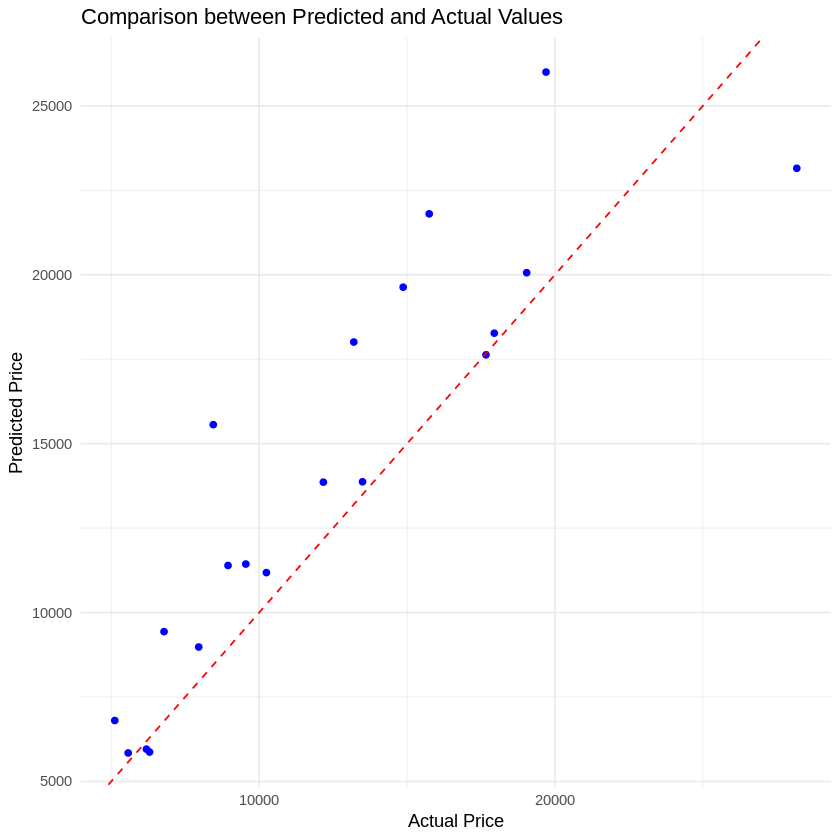

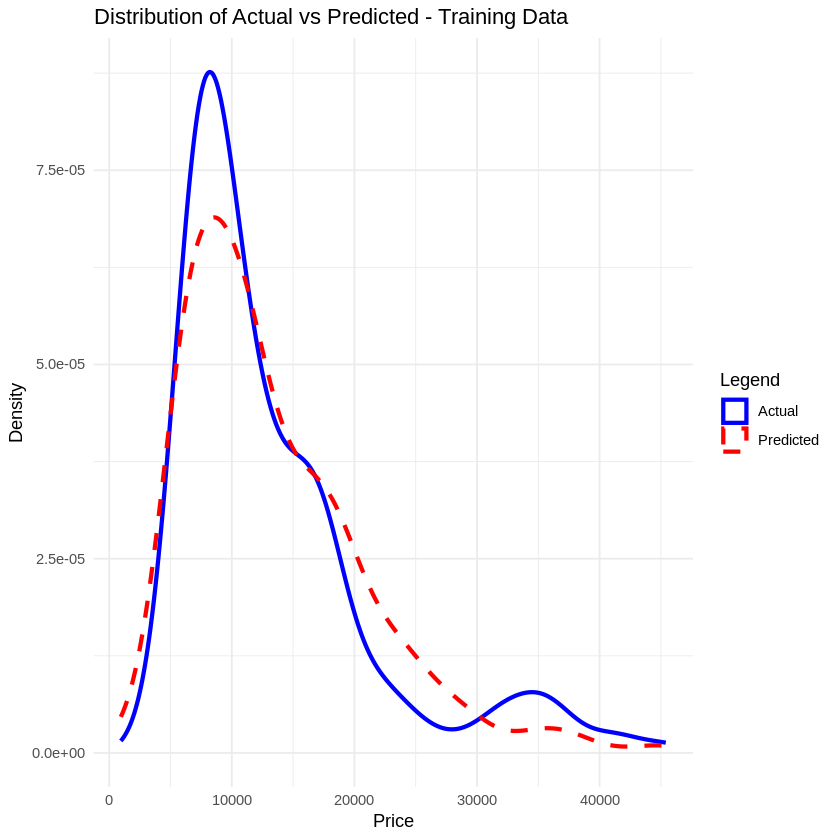

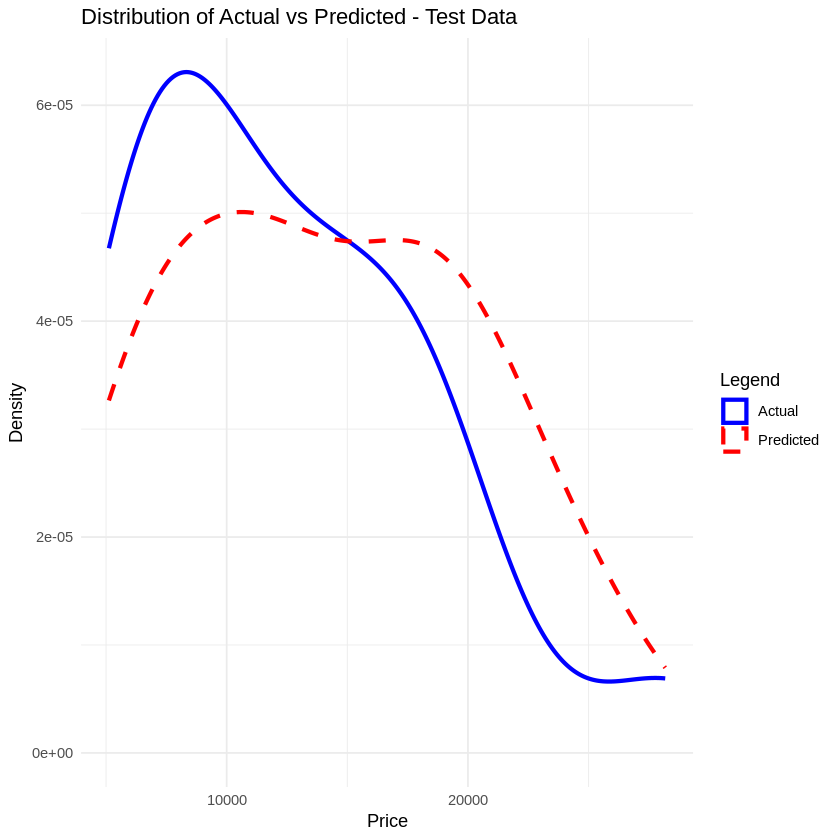

In [ ]:
# TO DO: Evaluate the model's performance using RMSE and R-squared for training data


# TO DO: Evaluate the model's performance using RMSE and R-squared for test data


# TO DO: Print evaluation metrics for training and test datasets
cat("Training Data:\n")
cat("RMSE:", train_rmse, "\n")
cat("R-squared:", train_r2, "\n")

cat("\nTest Data:\n")
cat("RMSE:", test_rmse, "\n")
cat("R-squared:", test_r2, "\n")

# TO DO: Visualize comparison between predicted and actual values using ggplot2


# TO DO: Define a custom function to plot distribution of actual vs predicted values


# TO DO: Plot the distribution for training data


# TO DO: Plot the distribution for test data




## Questions:
1. How does the R-squared value help in understanding the model's performance?

Answer:
2. What does the RMSE value signify in this context?

Answer:
3. Why is it important to visualize the distribution of actual vs predicted values?

Answer:

<h2>Overfitting</h2>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


## Section 2: Linear Regression Model - Data Subset Training and Evaluation

In this section, you will:

- Use a subset of the original training data (55%) to create a linear regression model.
- Evaluate the model's performance on the remaining 45% of the training data and the original test dataset.
- Visualize the predicted results compared to actual values for analysis.


In [ ]:
install.packages("polycor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘admisc’




Use 55% of the initial training set to train the model, leaving the remaining 45% to validate the model.


Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = data.frame(x_train_55, price = y_train_55))

Residuals:
    Min      1Q  Median      3Q     Max 
-8370.2 -1855.6   142.8  1462.6 11679.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -12550.540   7146.396  -1.756  0.08231 . 
horsepower      73.915     23.387   3.161  0.00212 **
curb.weight      4.367      1.722   2.536  0.01287 * 
engine.size     52.732     21.945   2.403  0.01823 * 
highway.mpg      5.681    124.617   0.046  0.96374   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3690 on 94 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.7727 
F-statistic:  84.3 on 4 and 94 DF,  p-value: < 2.2e-16


Remaining Training Data (45%):
RMSE: 3559.781 
R-squared: 0.8265403 

Test Data:
RMSE: 3242.91 
R-squared: 0.6956667 


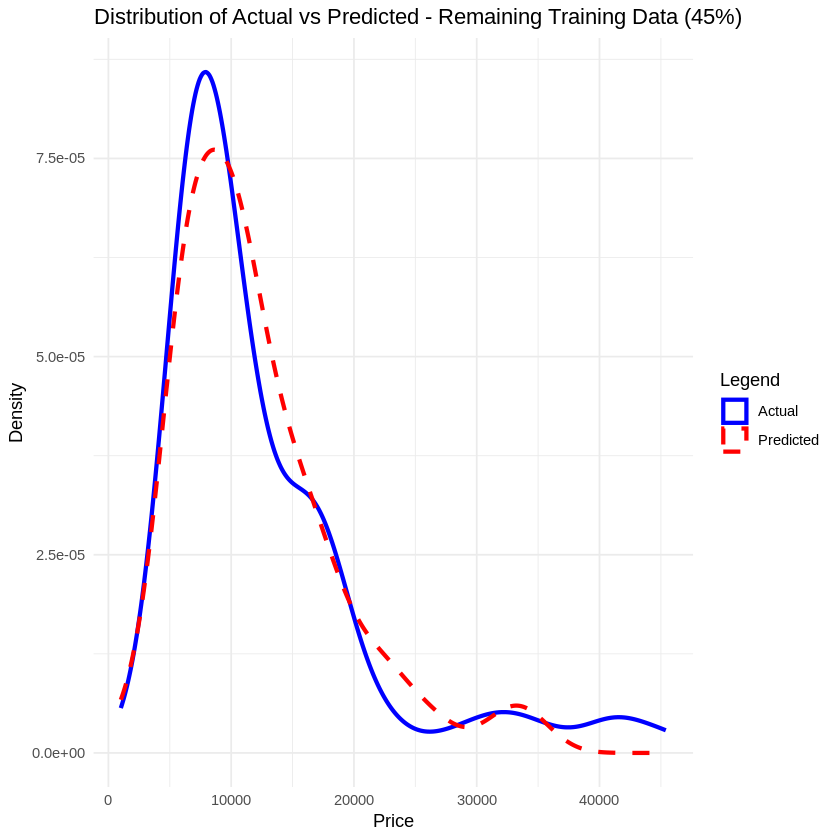

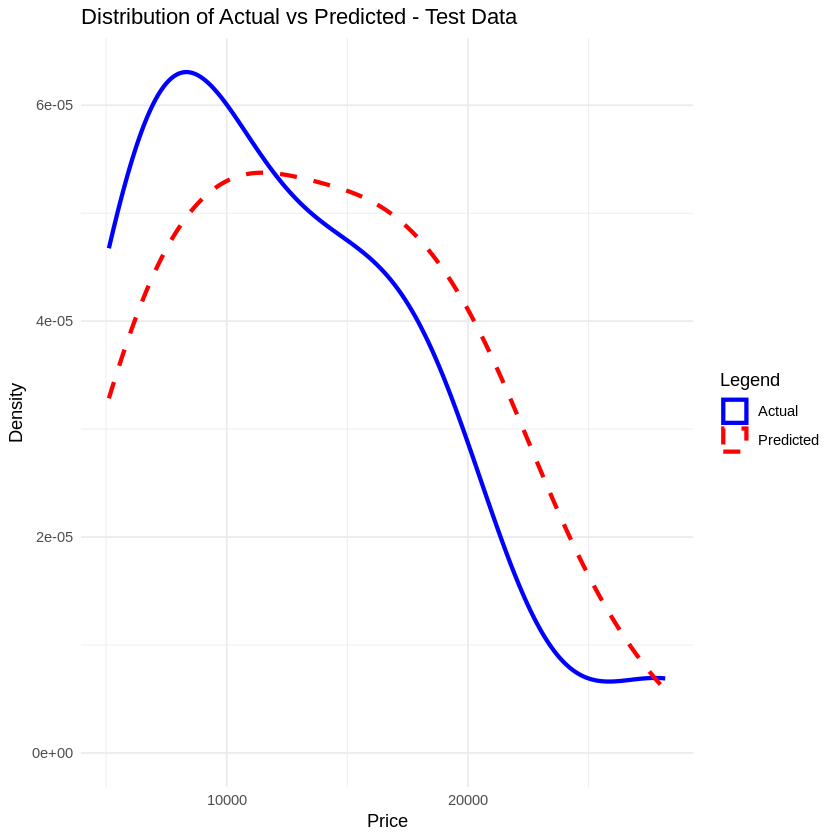

In [ ]:
# TO DO: Split 55% of the original training data for model training
set.seed(123)


# TO DO: Store the remaining 45% for validation


# TO DO: Create a linear regression model using 55% of the training data

# TO DO: Display the summary of the regression model trained on 55% data
summary(lre_multi_55)

# TO DO: Predict values for the remaining 45% of the training data



# TO DO: Predict values for the original test data


# TO DO: Evaluate the model's performance using RMSE and R-squared for remaining training data (45%)

# TO DO: Evaluate the model's performance using RMSE and R-squared for the test data


# TO DO: Print evaluation metrics for remaining training and test datasets

# TO DO: Plot the distribution for the remaining 45% of the training data


# TO DO: Plot the distribution for the test data





## Questions:
1. What does training the model on only 55% of the data demonstrate?

Answer:
2. How can RMSE and R-squared metrics change when the training data is limited?

Answer:
3. Why is it important to evaluate the model on different subsets of data?

Answer:

Section 3: Polynomial Regression - Degree 3 Model Training and Evaluation


In this session, you will:

1. Create polynomial features (degree 3) for the horsepower variable.
2. Use these polynomial features to build a polynomial regression model.
3. Evaluate the model's performance on the remaining 45% of the training data and the original test dataset.
4. Visualize the predicted results compared to actual values for analysis.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Call:
lm(formula = price ~ horsepower_poly + curb.weight + engine.size + 
    highway.mpg, data = data.frame(x_train_55_poly, price = y_train_55))

Residuals:
     Min       1Q   Median       3Q      Max 
-10150.1  -1947.7     59.1   1354.9  12156.7 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -2.060e+03  5.930e+03  -0.347  0.72903   
horsepower_poly  8.882e-04  2.892e-04   3.071  0.00279 **
curb.weight      4.742e+00  1.766e+00   2.686  0.00856 **
engine.size      4.935e+01  2.302e+01   2.144  0.03464 * 
highway.mpg     -1.519e+02  1.016e+02  -1.495  0.13819   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3700 on 94 degrees of freedom
Multiple R-squared:  0.7808,	Adjusted R-squared:  0.7715 
F-statistic: 83.73 on 4 and 94 DF,  p-value: < 2.2e-16


Remaining Training Data (45%) with Polynomial Model:
RMSE: 3573.54 
R-squared: 0.8251969 

Test Data with Polynomial Model:
RMSE: 3064.006 
R-squared: 0.7283193 


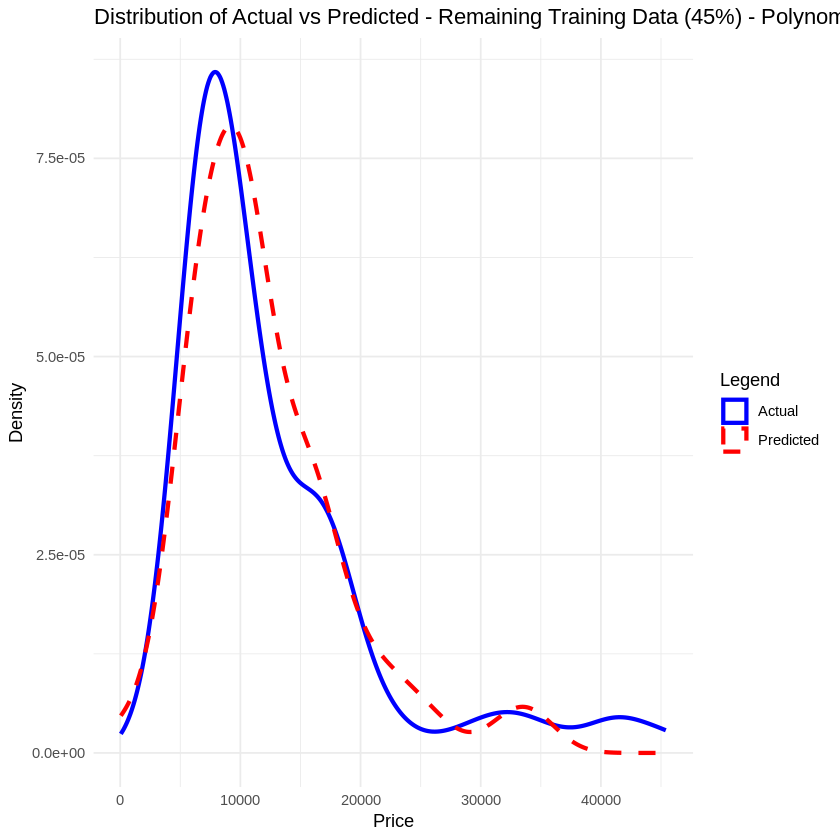

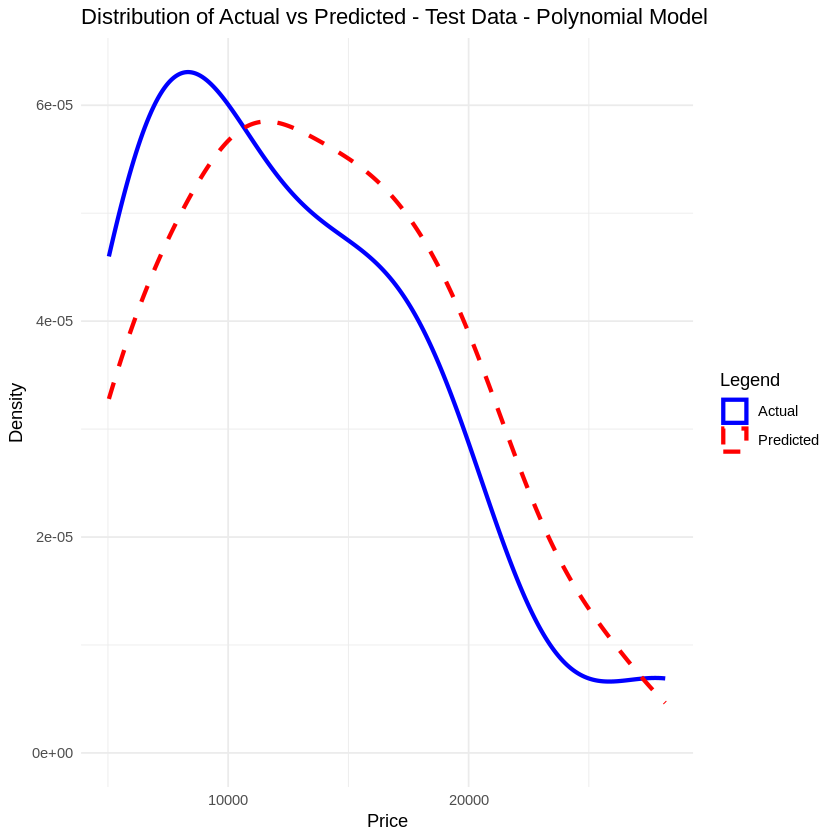

In [ ]:
# TO DO: Load the libraries
library(dplyr)
library(ggplot2)

# TO DO: Generate cubic polynomial features for horsepower
x_train_55_poly <- x_train_55 %>%
  mutate(horsepower_poly = horsepower^3)

x_train_remain_poly <- x_train_remain %>%
  mutate(horsepower_poly = horsepower^3)

x_test_poly <- x_test %>%
  mutate(horsepower_poly = horsepower^3)

# TO DO: Train a polynomial regression model using cubic features
poly_model <- lm(price ~ horsepower_poly + curb.weight + engine.size + highway.mpg,
                 data = data.frame(x_train_55_poly, price = y_train_55))

# TO DO: Display the summary of the polynomial regression model
summary(poly_model)

# TO DO: Predict values for the remaining 45% of the training data using the polynomial model
y_train_remain_poly_pred <- predict(poly_model, newdata = x_train_remain_poly)

# TO DO: Predict values for the original test data using the polynomial model
y_test_poly_pred <- predict(poly_model, newdata = x_test_poly)

# TO DO: Evaluate the polynomial model using RMSE and R-squared for remaining training data (45%)
train_remain_poly_rmse <- sqrt(mean((y_train_remain - y_train_remain_poly_pred)^2))
train_remain_poly_r2 <- 1 - sum((y_train_remain - y_train_remain_poly_pred)^2) / sum((y_train_remain - mean(y_train_remain))^2)

# TO DO: Evaluate the polynomial model using RMSE and R-squared for the test data
test_poly_rmse <- sqrt(mean((y_test - y_test_poly_pred)^2))
test_poly_r2 <- 1 - sum((y_test - y_test_poly_pred)^2) / sum((y_test - mean(y_test))^2)

# TO DO: Print evaluation metrics for remaining training and test datasets
cat("Remaining Training Data (45%) with Polynomial Model:\n")
cat("RMSE:", train_remain_poly_rmse, "\n")
cat("R-squared:", train_remain_poly_r2, "\n")

cat("\nTest Data with Polynomial Model:\n")
cat("RMSE:", test_poly_rmse, "\n")
cat("R-squared:", test_poly_r2, "\n")

# TO DO: Plot the distribution for the remaining 45% of the training data using the polynomial model
distribution_plot(y_train_remain, y_train_remain_poly_pred, "Remaining Training Data (45%) - Polynomial Model")

# TO DO: Plot the distribution for the test data using the polynomial model
distribution_plot(y_test, y_test_poly_pred, "Test Data - Polynomial Model")




## Questions:
1. What is the purpose of using polynomial features for regression?

Answer:
2. How does the cubic transformation of the horsepower variable impact model predictions?

Answer:
3. Why is it important to compare polynomial models with simpler linear models?

Answer:


In [ ]:
install.packages("polycor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘admisc’




## Section 4: Comparing Polynomial Regression Models - Degree 5 vs. Degree 11

In this session, you will:

1. Create polynomial features for the horsepower variable using degrees 5 and 11.
2. Train two polynomial regression models with these features.
3. Evaluate the performance of the models on the remaining 45% of the training data and the test dataset.
4. Compare the models to understand the impact of polynomial degree on prediction accuracy.
5. Visualize the results to analyze and compare the distribution of actual vs. predicted values.


Call:
lm(formula = price ~ horsepower_poly, data = data.frame(x_train_55_poly, 
    price = y_train_55))

Residuals:
    Min      1Q  Median      3Q     Max 
-8586.2 -2046.7  -383.6  1401.0 14575.8 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)       1.010e+05  5.716e+04   1.767   0.0806 .
horsepower_poly1 -4.348e+03  2.375e+03  -1.831   0.0703 .
horsepower_poly2  7.412e+01  3.733e+01   1.986   0.0500 .
horsepower_poly3 -5.793e-01  2.778e-01  -2.086   0.0397 *
horsepower_poly4  2.146e-03  9.799e-04   2.190   0.0310 *
horsepower_poly5 -3.003e-06  1.313e-06  -2.287   0.0245 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4180 on 93 degrees of freedom
Multiple R-squared:  0.7233,	Adjusted R-squared:  0.7084 
F-statistic: 48.62 on 5 and 93 DF,  p-value: < 2.2e-16


Remaining Training Data (45% - Polynomial Degree 5):
RMSE: 4872.838 
R-squared: 0.6749757 

Test Data (Polynomial Degree 5):
RMSE: 5275.235 
R-squared: 0.1946898 


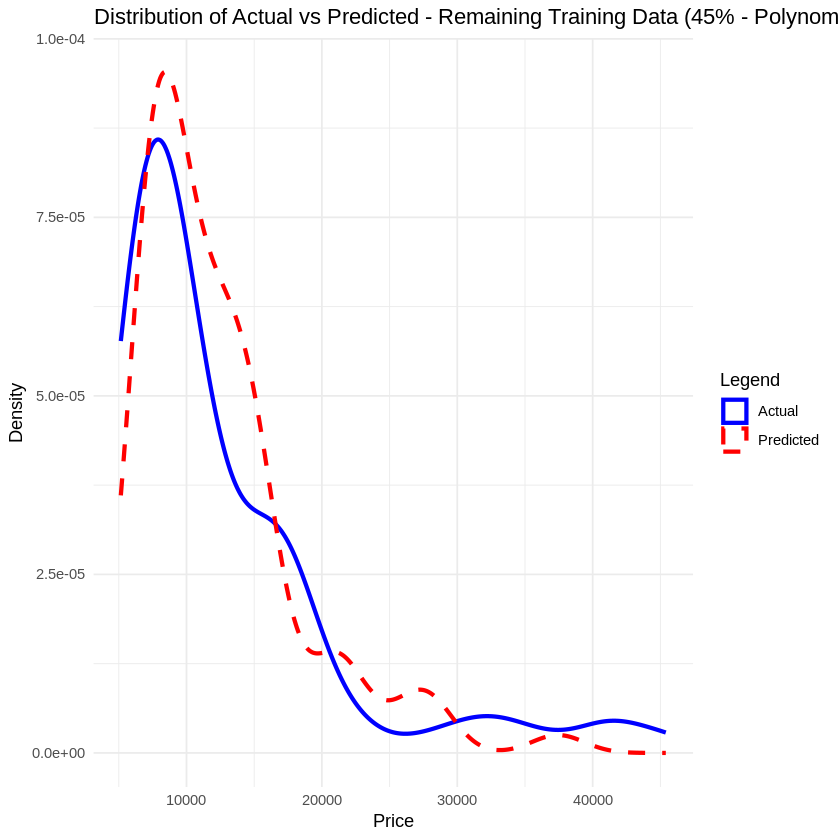

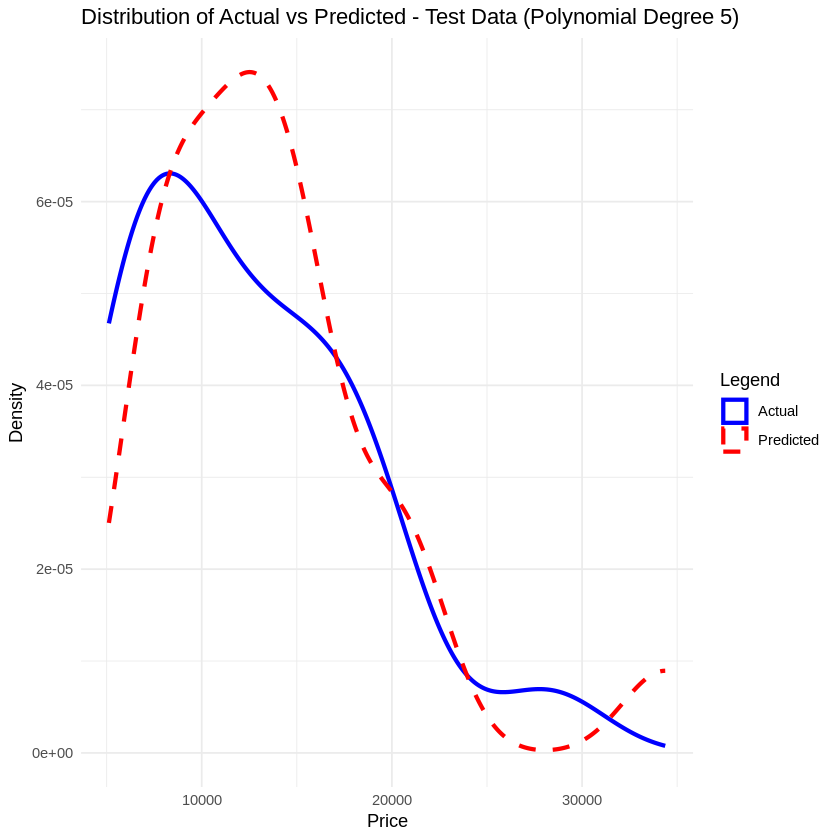

In [ ]:
# Tạo các biến đa thức bậc 5 cho horsepower
library(dplyr)

# TO DO: Generate degree 5 polynomial features for horsepower



# TO DO: Train a polynomial regression model with degree 5 features


# TO DO: Generate degree 11 polynomial features for horsepower


# TO DO: Train a polynomial regression model with degree 11 features

# TO DO: Display the summary for degree 5 polynomial regression model
summary(lre_poly_5)

# TO DO: Display the summary for degree 11 polynomial regression model
summary(lre_poly_11)


# TO DO: Predict values for the remaining 45% of the training data using degree 5 model


# TO DO: Predict values for the original test data using degree 5 model

# TO DO: Predict values for the remaining 45% of the training data using degree 11 model


# TO DO: Predict values for the original test data using degree 11 model



# TO DO: Evaluate degree 5 polynomial model


# TO DO: Evaluate degree 11 polynomial model


# TO DO: Print evaluation metrics for both polynomial models



# TO DO: Plot distribution for remaining training data using degree 5 model
"Remaining Training Data (45% - Polynomial Degree 5)")

# TO DO: Plot distribution for test data using degree 5 model
"Test Data (Polynomial Degree 5)")

# TO DO: Plot distribution for remaining training data using degree 11 model
 "Remaining Training Data (45% - Polynomial Degree 11)")

# TO DO: Plot distribution for test data using degree 11 model
"Test Data (Polynomial Degree 11)")




Call:
lm(formula = price ~ horsepower_poly_11, data = data.frame(x_train_55_poly_11, 
    price = y_train_55))

Residuals:
    Min      1Q  Median      3Q     Max 
-8947.1 -1637.1  -332.7  1230.0 16067.8 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)           7.087e+06  2.012e+07   0.352    0.725
horsepower_poly_111  -6.701e+05  1.854e+06  -0.361    0.719
horsepower_poly_112   2.775e+04  7.462e+04   0.372    0.711
horsepower_poly_113  -6.612e+02  1.727e+03  -0.383    0.703
horsepower_poly_114   1.003e+01  2.541e+01   0.395    0.694
horsepower_poly_115  -1.009e-01  2.479e-01  -0.407    0.685
horsepower_poly_116   6.788e-04  1.616e-03   0.420    0.676
horsepower_poly_117  -2.984e-06  6.881e-06  -0.434    0.666
horsepower_poly_118   7.964e-09  1.777e-08   0.448    0.655
horsepower_poly_119  -1.037e-11  2.240e-11  -0.463    0.644
horsepower_poly_1110         NA         NA      NA       NA
horsepower_poly_11

Remaining Training Data (45% - Polynomial Degree 11):
RMSE: 4059.367 
R-squared: 0.7744366 

Test Data (Polynomial Degree 11):
RMSE: 8271.134 
R-squared: -0.9797472 


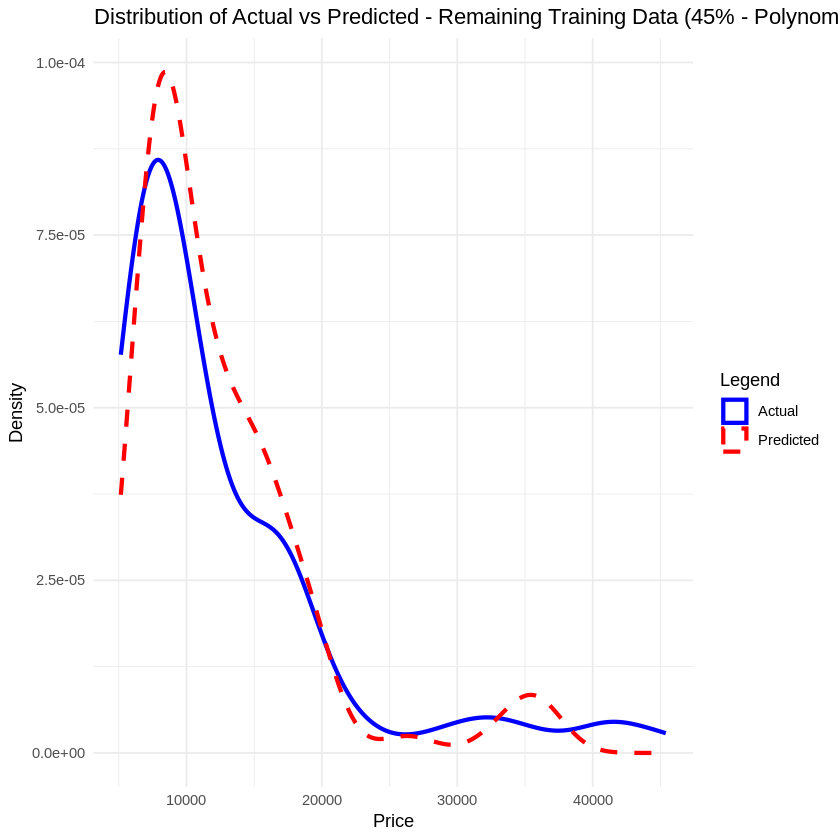

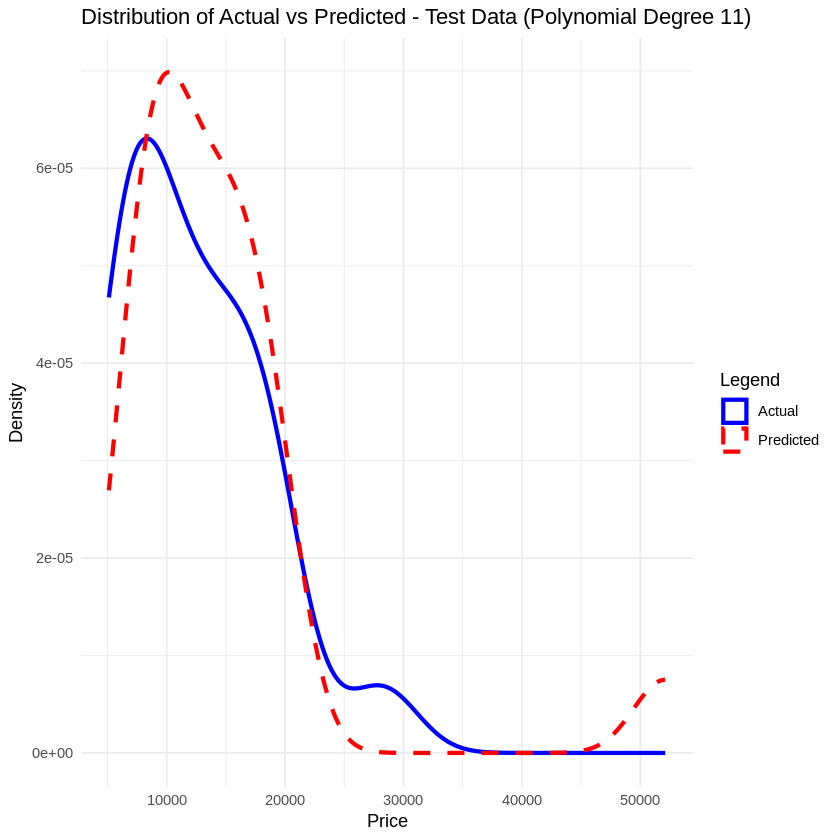

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data: R-squared: 0.7744366


R^2 of the test data: R-squared: -0.9797472


We see the R^2 for the training data is 0.7744366 while the R^2 on the test data was -0.9797472 .  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


### Task Description and Requirements
The objective of this task is to analyze and visualize the performance of polynomial regression models for predicting car prices based on horsepower. Specifically, we will compare polynomial regression models of degrees ranging from 1 to 11 and evaluate the quality of the fit using the R-squared metric.

Degree: 1 R^2: 0.6943162 
Degree: 2 R^2: 0.6960052 
Degree: 3 R^2: 0.701891 
Degree: 4 R^2: 0.707729 
Degree: 5 R^2: 0.7232873 
Degree: 6 R^2: 0.7239691 
Degree: 7 R^2: 0.7362115 
Degree: 8 R^2: 0.7424176 
Degree: 9 R^2: 0.7438045 
Degree: 10 R^2: 0.7438045 
Degree: 11 R^2: 0.7445109 


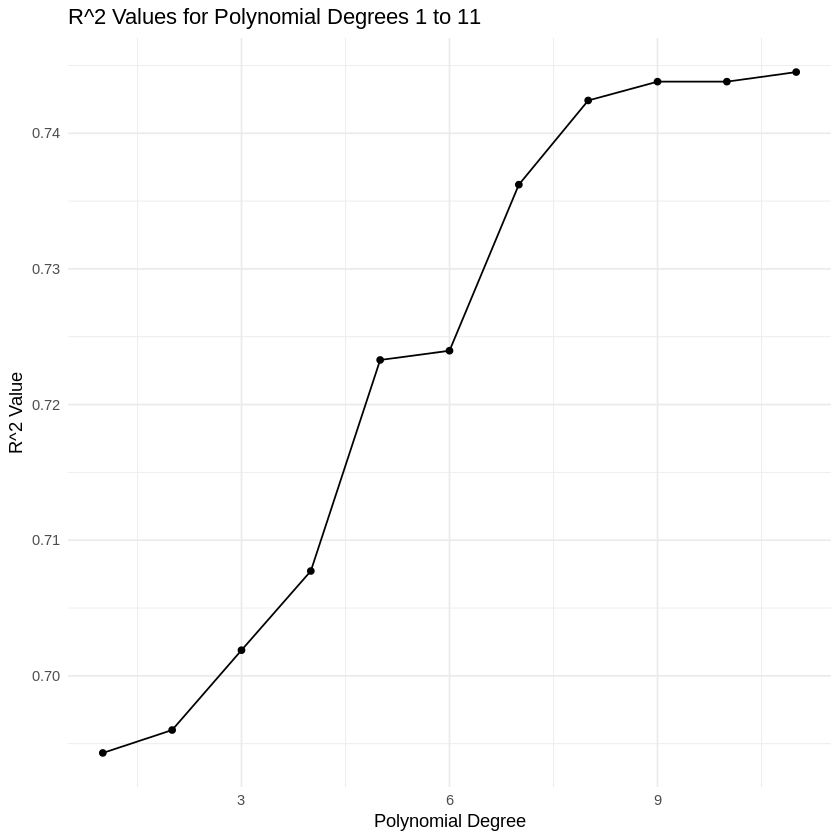

In [ ]:
# Initialize a vector to store R^2 values
r_squared_values <- numeric(11)

# TO DO: Loop to create polynomial regression models for degrees 1 to 11



# Print R^2 values for each polynomial degree
for (degree in 1:11) {
  cat("Degree:", degree, "R^2:", r_squared_values[degree], "\n")
}

# Plot R^2 values against polynomial degrees - Visualization
library(ggplot2)

# Create dataframe for visualization
r_squared_df <- data.frame(Degree = 1:11, R_squared = r_squared_values)

# Generate plot - TO DO



## Đánh Giá R²

1. **Bậc 1 (R² = 0.6943)**:
   - Mô hình hồi quy tuyến tính đơn giản với biến `horsepower` có thể giải thích khoảng 69.43% phương sai của biến mục tiêu `price`. Đây là một R^2 tốt cho mô hình đơn giản, nhưng có thể cải thiện.

2. **Bậc 2 (R² = 0.6960)**:
   - Việc thêm một bậc đa thức đã cải thiện nhẹ độ chính xác, với \( R^2 \) tăng lên 69.60%. Sự cải thiện là nhỏ nhưng cho thấy mô hình đang bắt đầu nắm bắt thêm một số biến thể trong dữ liệu.

3. **Bậc 3 (R² = 0.7019)**:
   - Tăng thêm một bậc nữa dẫn đến việc giải thích khoảng 70.19% phương sai, cho thấy mô hình có thể bắt đầu nắm bắt được các mối quan hệ phi tuyến tính giữa `horsepower` và `price`.

4. **Bậc 4 (R² = 0.7077)**:
   - Với \( R^2 \) tăng lên 70.77%, mô hình tiếp tục cải thiện độ chính xác. Điều này cho thấy rằng mối quan hệ giữa `horsepower` và `price` có thể phức tạp hơn và một mô hình phi tuyến tính hơn là cần thiết.

5. **Bậc 5 (R² = 0.7233)**:
   - Mô hình với bậc 5 đã giải thích khoảng 72.33% phương sai, cho thấy một sự cải thiện đáng kể. Điều này cho thấy mô hình đang bắt đầu nắm bắt được các xu hướng quan trọng trong dữ liệu.

6. **Bậc 6 (R² = 0.7240)**:
   - Chỉ số này rất gần với bậc 5, cho thấy rằng việc thêm bậc thứ 6 không tạo ra sự cải thiện đáng kể trong độ chính xác của mô hình.

7. **Bậc 7 (R² = 0.7362)**:
   - Với \( R^2 \) là 73.62%, mô hình bắt đầu cho thấy sự cải thiện lại. Điều này có thể cho thấy rằng độ phức tạp của mô hình đang tạo ra lợi ích.

8. **Bậc 8 (R² = 0.7424)**:
   - Tăng nhẹ \( R^2 \) lên 74.24%, mô hình bắt đầu giải thích một phần lớn hơn của phương sai trong `price`.

9. **Bậc 9 (R² = 0.7438)**:
   - R² chỉ tăng một chút (0.7438), cho thấy mô hình đang đạt đến giới hạn khả năng giải thích của nó.

10. **Bậc 10 (R² = 0.7438)**:
    - Không có sự cải thiện so với bậc 9. Điều này có thể cho thấy mô hình đã đạt đến một mức độ phức tạp tối ưu.

11. **Bậc 11 (R² = 0.7445)**:
    - Mặc dù có sự tăng nhẹ, nhưng mức tăng rất nhỏ. do đó khi thêm một bậc đa thức nữa không cải thiện đáng kể độ chính xác và có thể dẫn đến hiện tượng overfitting.

### Kết Luận:
- **Tăng Trưởng Đầu Tiên**: Các bậc thấp (từ 1 đến 5) cho thấy sự cải thiện đáng kể về \( R^2 \). Điều này cho thấy mô hình đang học hỏi từ dữ liệu và nắm bắt được các mối quan hệ quan trọng.
- **Khả Năng Tăng Trưởng Giảm Dần**: Sau bậc 5, mặc dù có sự tăng trưởng trong \( R^2 \), nhưng mức độ cải thiện bắt đầu giảm dần và trở nên không đáng kể.
- **Overfitting**: Các mô hình với bậc cao (trên 8) có thể dẫn đến hiện tượng overfitting, vì mô hình học hỏi quá mức từ dữ liệu huấn luyện và không tổng quát tốt cho dữ liệu mới.



<h2 id="ref3">Part 3: Ridge Regression</h2>


The objective of this task is to perform Ridge Regression with a polynomial degree of 11 on the horsepower variable, evaluate the model's predictive performance, and visualize the results. Ridge Regression, a regularized form of linear regression, helps prevent overfitting by adding a penalty to the regression coefficients based on a regularization parameter, lambda.

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




R^2 cho mo hinh hoi quy Ridge (bac 11) voi lambda = 0.5 : 0.06512191 


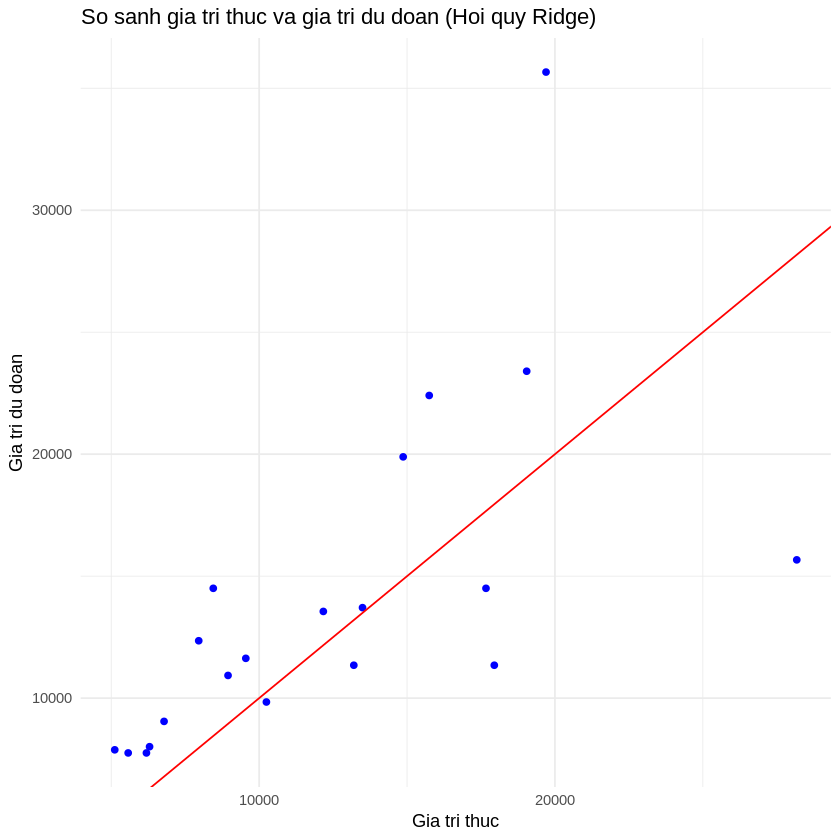

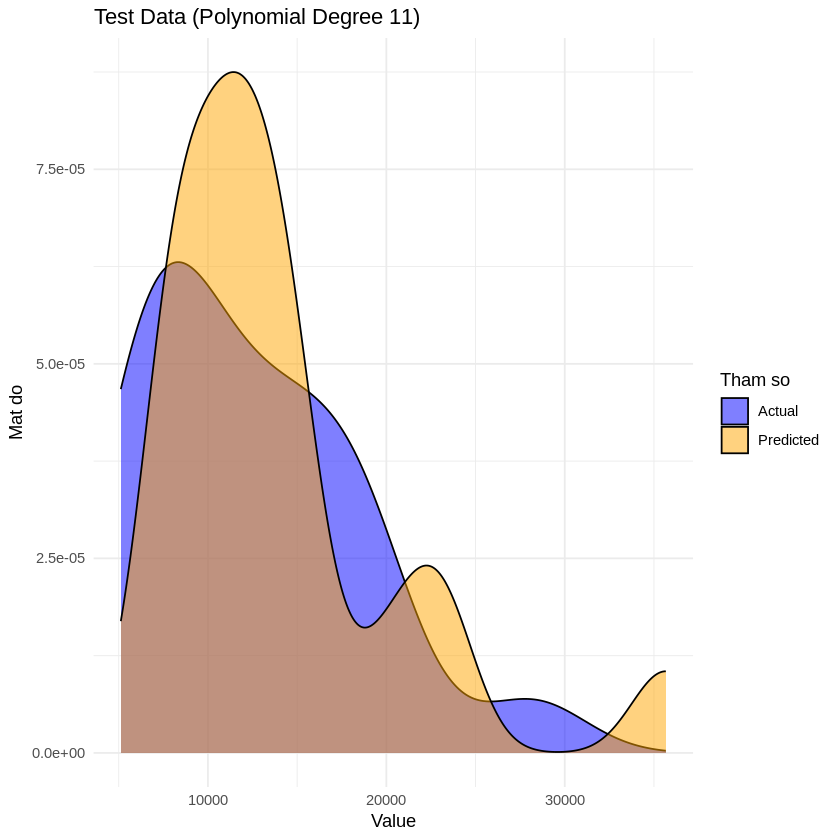

In [ ]:
# Libraries
library(MASS)   # Library for Ridge Regression
library(ggplot2)

# Generate polynomial features for horsepower up to degree 11 in the training data - TO DO


# Set column names for the polynomial features - TO DO



# Train Ridge Regression model with lambda = 0.5 - TO DO


# Generate polynomial features for the test data - TO DO



# Set column names for the polynomial features in the test data - TO DO


# Convert test data to matrix for prediction
x_test_matrix <- as.matrix(x_test_poly)

# Predict prices using the trained Ridge Regression model - TO DO


# Calculate R^2 for the test data - Evaluation
rss <- sum((y_test - y_pred_ridge) ^ 2)
tss <- sum((y_test - mean(y_test)) ^ 2)
r_squared_ridge <- 1 - (rss / tss)

# Print R^2 value for Ridge Regression (degree 11) with lambda
cat("R^2 for Ridge Regression (degree 11) with lambda =", lambda_value, ":", r_squared_ridge, "\n")

# Visualization: Scatter plot for Actual vs. Predicted values


# Function to create a Distribution Plot - TO DO

# Create Distribution Plot for test data
distribution_plot(y_test, y_pred_ridge, "Test Data (Polynomial Degree 11)")


### Description and Requirements
- This task focuses on applying Ridge Regression using polynomial features of degree 11 for the horsepower variable. The goal is to explore different values of the regularization parameter (lambda), identify the optimal value using Generalized Cross-Validation (GCV), and evaluate the predictive performance of the model using test data.

Gia tri lambda toi uu: 0 
R^2 cho mo hinh hoi quy Ridge (bac 11) voi lambda = 0 : -1.507141 


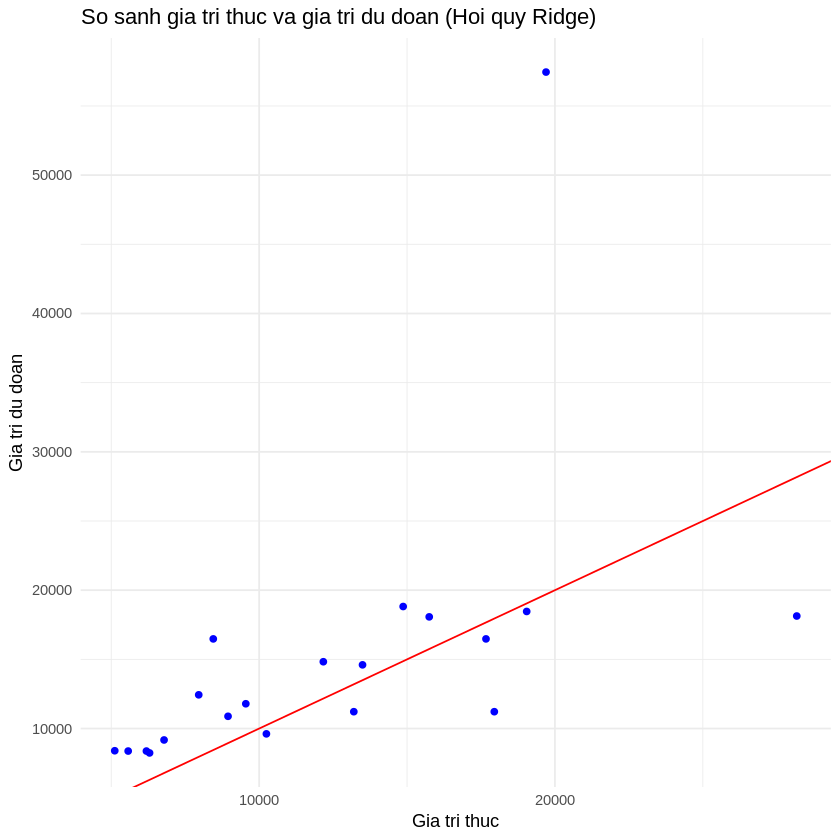

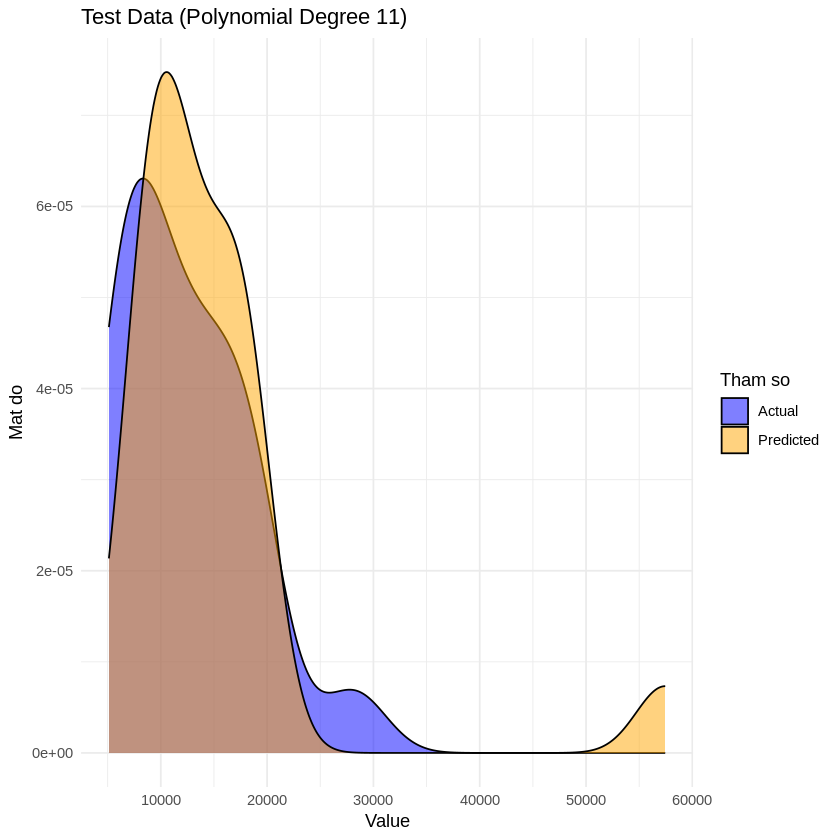

In [ ]:
# Libraries
library(MASS)   # Library for Ridge Regression
library(ggplot2)

# Generate polynomial features for horsepower up to degree 11 in the training data - TO DO


# Set column names for the polynomial features - TO DO
colnames(x_train_poly) <- c("horsepower", paste0("X", 1:11))

# Perform Ridge Regression for a range of lambda values - TO DO
lambdas <- seq(0, 10, by = 0.1)

# Select optimal lambda based on GCV - TO DO

# Train Ridge Regression model with the optimal lambda - TO DO

# Generate polynomial features for the test data - TO DO


# Set column names for the polynomial features in the test data - TO DO


# Convert test data to matrix for prediction


# Predict prices using the trained Ridge Regression model with optimal lambda - TO DO


# Calculate R^2 for the test data - Evaluation


# Print R^2 value for Ridge Regression (degree 11) with optimal lambda
cat("R^2 for Ridge Regression (degree 11) with optimal lambda =", optimal_lambda, ":", r_squared_ridge, "\n")

# Visualization: Scatter plot for Actual vs. Predicted values


# Function to create a Distribution Plot - TO DO


# Create Distribution Plot for test data
distribution_plot(y_test, y_pred_ridge, "Test Data (Polynomial Degree 11)")


**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 decreases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




Ridge Regression with polynomial features of degree 11 will be used to predict car prices based on the horsepower variable. This involves training a Ridge Regression model with a fixed regularization parameter (alpha = 10), predicting car prices for test data, and evaluating model performance using the R-squared metric. A distribution plot will also be created to visually compare the actual and predicted values.

R^2 cho mo hinh hoi quy Ridge (bac 11) voi alpha = 10: 0.1167197 


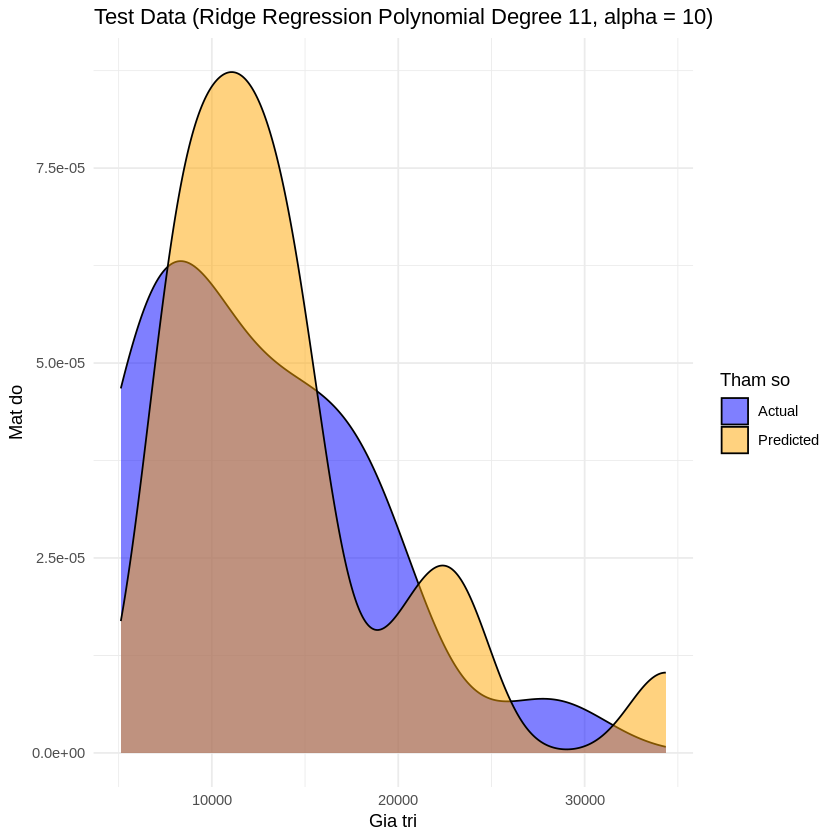

In [ ]:
# Necessary Libraries
library(MASS)   # Library for Ridge Regression
library(ggplot2)

# Generate polynomial features for horsepower up to degree 11 in the training data - TO DO


# Set column names for the polynomial features - TO DO


# Train Ridge Regression model with alpha = 10 - TO DO


# Generate polynomial features for the test data - TO DO


# Set column names for the polynomial features in the test data - TO DO


# Convert test data to matrix for prediction


# Predict prices using the trained Ridge Regression model with alpha = 10 - TO DO


# Calculate R² for the test data - Evaluation
rss <- sum((y_test - y_pred_ridge) ^ 2)
tss <- sum((y_test - mean(y_test)) ^ 2)
r_squared_ridge <- 1 - (rss / tss)

# Print R² value for Ridge Regression (degree 11) with alpha = 10
cat("R^2 for Ridge Regression (degree 11) with alpha = 10:", r_squared_ridge, "\n")

# Function to create a Distribution Plot - TO DO


# Create Distribution Plot for test data
distribution_plot(y_test, y_pred_ridge, "Test Data (Ridge Regression Polynomial Degree 11, alpha = 10)")


<h2 id="ref4">Part 4: Grid Search</h2>


lambda tối ưu và R^2 tốt nhất (0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000)

In [ ]:
# Thư viện cần thiết
library(MASS)   # Thư viện cho hồi quy Ridge

# Tạo các đặc trưng đa thức bậc 11 cho biến horsepower
x_train_poly <- data.frame(horsepower = x_train$horsepower)
x_train_poly <- cbind(x_train_poly, poly(x_train$horsepower, degree = 11, raw = TRUE))

# Đặt tên cho các biến đa thức
colnames(x_train_poly) <- c("horsepower", paste0("X", 1:11))

# Tạo đặc trưng đa thức cho dữ liệu test
x_test_poly <- data.frame(horsepower = x_test$horsepower)
x_test_poly <- cbind(x_test_poly, poly(x_test$horsepower, degree = 11, raw = TRUE))

# Đặt tên cho các biến đa thức trong dữ liệu test
colnames(x_test_poly) <- c("horsepower", paste0("X", 1:11))

# Chuyển đổi x_test_poly thành ma trận số
x_test_matrix <- as.matrix(x_test_poly)

# Danh sách giá trị lambda cần thử
lambda_values <- c(0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000)
best_lambda <- NULL
best_r_squared <- -Inf

# Vòng lặp tìm giá trị lambda tối ưu
for (lambda in lambda_values) {

  # Huấn luyện mô hình hồi quy Ridge với lambda hiện tại
  ridge_model <- lm.ridge(price ~ ., data = data.frame(x_train_poly, price = y_train), lambda = lambda)

  # Dự đoán giá trị với mô hình hồi quy Ridge
  y_pred_ridge <- as.vector(cbind(1, x_test_matrix) %*% coef(ridge_model))

  # Tính toán R² cho dữ liệu test
  rss <- sum((y_test - y_pred_ridge) ^ 2)
  tss <- sum((y_test - mean(y_test)) ^ 2)
  r_squared_ridge <- 1 - (rss / tss)

  # Kiểm tra nếu đây là giá trị R² tốt nhất
  if (r_squared_ridge > best_r_squared) {
    best_r_squared <- r_squared_ridge
    best_lambda <- lambda
  }

  # In kết quả cho mỗi lambda
  cat("Lambda =", lambda, "- R^2 =", r_squared_ridge, "\n")
}

# In ra lambda tối ưu và R^2 tốt nhất
cat("Gia tri lambda tot nhat:", best_lambda, "\n")
cat("R^2 tot nhat cho lambda =", best_lambda, ":", best_r_squared, "\n")


Lambda = 0.001 - R^2 = 0.04128939 
Lambda = 0.1 - R^2 = 0.05527595 
Lambda = 1 - R^2 = 0.07138966 
Lambda = 10 - R^2 = 0.1167197 
Lambda = 100 - R^2 = 0.2566883 
Lambda = 1000 - R^2 = 0.3296223 
Lambda = 10000 - R^2 = 0.07998838 
Lambda = 1e+05 - R^2 = -0.01297159 
Lambda = 1e+06 - R^2 = -0.02450953 
Gia tri lambda tot nhat: 1000 
R^2 tot nhat cho lambda = 1000 : 0.3296223 


We now test our model on the test data:

xây dựng mô hình Ridge Regression với lambda tối ưu là 1000 và đánh giá trên tập dữ liệu test

R^2 cho mo hinh hoi quy Ridge (bac 11) voi lambda = 1000 : 0.3296223 


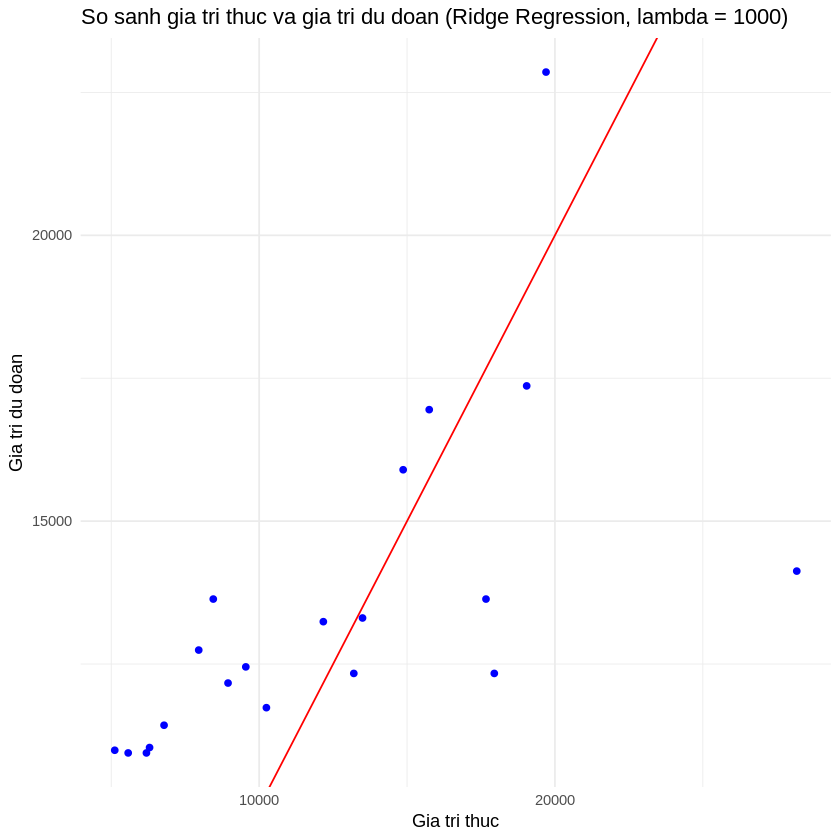

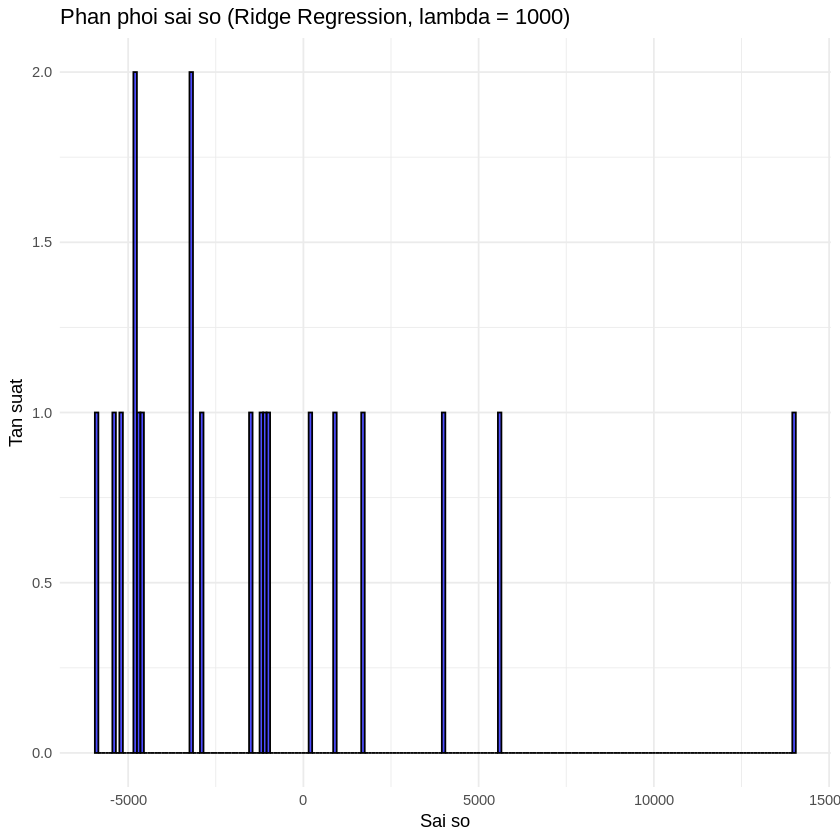

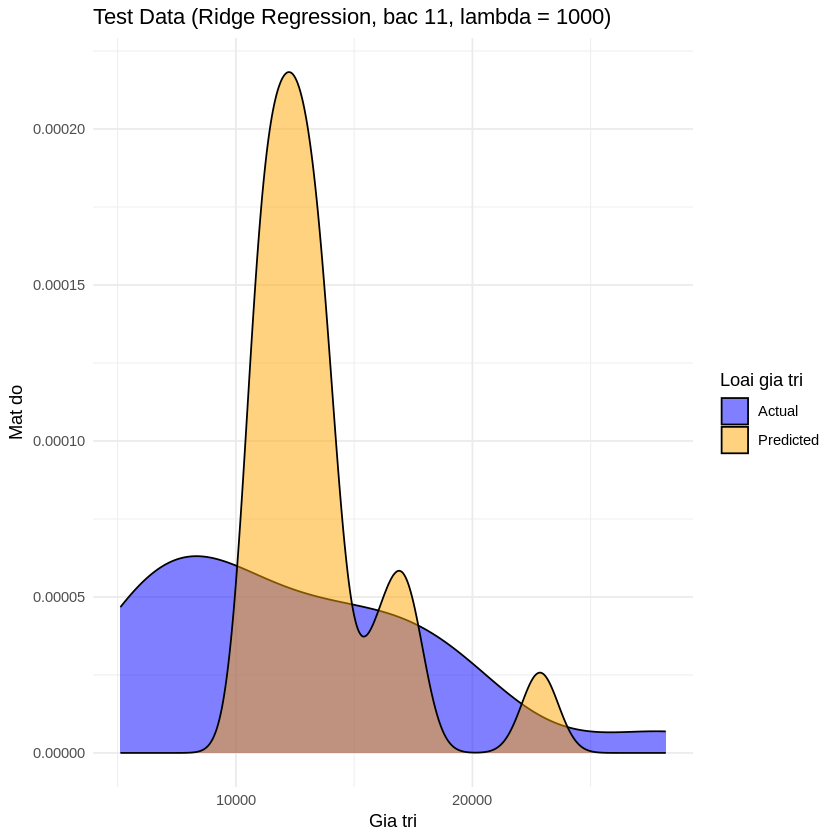

In [ ]:
# Thư viện
library(MASS)   # Thư viện cho hồi quy Ridge
library(ggplot2)

# Tạo các đặc trưng đa thức bậc 11 cho biến horsepower trong dữ liệu train
x_train_poly <- data.frame(horsepower = x_train$horsepower)
x_train_poly <- cbind(x_train_poly, poly(x_train$horsepower, degree = 11, raw = TRUE))

# Đặt tên cho các biến đa thức
colnames(x_train_poly) <- c("horsepower", paste0("X", 1:11))

# Tạo đặc trưng đa thức bậc 11 cho biến horsepower trong dữ liệu test
x_test_poly <- data.frame(horsepower = x_test$horsepower)
x_test_poly <- cbind(x_test_poly, poly(x_test$horsepower, degree = 11, raw = TRUE))

# Đặt tên cho các biến đa thức trong dữ liệu test
colnames(x_test_poly) <- c("horsepower", paste0("X", 1:11))

# Huấn luyện mô hình hồi quy Ridge với lambda = 1000
lambda_value <- 1000
ridge_model <- lm.ridge(price ~ ., data = data.frame(x_train_poly, price = y_train), lambda = lambda_value)

# Chuyển đổi x_test_poly thành ma trận số cho dự đoán
x_test_matrix <- as.matrix(x_test_poly)

# Dự đoán giá trị với mô hình hồi quy Ridge
y_pred_ridge <- as.vector(cbind(1, x_test_matrix) %*% coef(ridge_model))

# Tính toán R^2 cho dữ liệu test
rss <- sum((y_test - y_pred_ridge) ^ 2)
tss <- sum((y_test - mean(y_test)) ^ 2)
r_squared_ridge <- 1 - (rss / tss)

# In ra kết quả R²
cat("R^2 cho mo hinh hoi quy Ridge (bac 11) voi lambda =", lambda_value, ":", r_squared_ridge, "\n")

# Vẽ biểu đồ so sánh giá trị thực và dự đoán
comparison_df <- data.frame(Actual = y_test, Predicted = y_pred_ridge)

ggplot(comparison_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "So sanh gia tri thuc va gia tri du doan (Ridge Regression, lambda = 1000)",
       x = "Gia tri thuc",
       y = "Gia tri du doan") +
  theme_minimal()

# Vẽ DistributionPlot cho sai số
distribution_plot <- function(y_true, y_pred, title) {
  error <- y_true - y_pred
  ggplot(data.frame(error = error), aes(x = error)) +
    geom_histogram(binwidth = 100, fill = "blue", color = "black", alpha = 0.7) +
    labs(title = title, x = "Sai so", y = "Tan suat") +
    theme_minimal()
}

# Vẽ phân phối sai số cho test data
distribution_plot(y_test, y_pred_ridge, "Phan phoi sai so (Ridge Regression, lambda = 1000)")

# Vẽ biểu đồ mật độ cho giá trị thực và dự đoán
density_plot <- function(y_true, y_pred, title) {
  data <- data.frame(
    Value = c(y_true, y_pred),
    Type = rep(c("Actual", "Predicted"), each = length(y_true))
  )

  ggplot(data, aes(x = Value, fill = Type)) +
    geom_density(alpha = 0.5) +
    labs(title = title, x = "Gia tri", y = "Mat do") +
    scale_fill_manual(name = "Loai gia tri", values = c("Actual" = "blue", "Predicted" = "orange")) +
    theme_minimal()
}

# Vẽ biểu đồ mật độ cho dữ liệu test
density_plot(y_test, y_pred_ridge, "Test Data (Ridge Regression, bac 11, lambda = 1000)")
